In [ ]:
## Obtendo os dados
import pandas as pd
faithful = pd.read_csv("faithful.csv", index_col = 0)
faithful.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


In [ ]:
# Função que computa o erro do oráculo
def erro_quadratico_acumulado(oraculo) :
    # Obtendo as observações de erupção e espera
    # do old faithful geyzer
    pontos_y = faithful.eruptions.values
    pontos_x = faithful.waiting.values

    # Vamos concatenar os quadrados das distâncias
    # entre a espera real e a predita
    erro = 0
    for i in range(len(pontos_x)) :
        # Usando o oráculo para obter a predição.
        # Posteriormente, chamaremos isso de
        # passo forward.
        predicted = oraculo(pontos_x[i])

        # O erro é o quadrado da diferença entre
        # o que foi predito e o que estava no
        # banco de dados
        erro += (predicted - pontos_y[i])**2

    return erro

In [ ]:
# Função que cria um gráfico do oráculo
import matplotlib.pyplot as plt
def plota_grafico(oraculo, with_error = False) :
    ## Plotando os pontos do banco de dados
    faithful.plot.scatter(x='waiting',
                          y='eruptions')

    ## Criando um eixo X para plotar a reta
    eixo_x = range(40,100,2)
    eixo_y = []

    ## Gerando a resposta do oráculo
    for x in eixo_x :
        eixo_y.append(oraculo(x))

    ## Plotando a reta
    plt.plot(eixo_x, eixo_y, 'r--', label='Valores Obtidos')

    if (with_error) :

        ## Colocando barras verticais para evidenciar erros
        ## do oráculo
        pontos_y = faithful.eruptions.values
        pontos_x = faithful.waiting.values
        for i in range(len(pontos_x)) :
            predicted = oraculo(pontos_x[i])
            plt.plot(
                (pontos_x[i], pontos_x[i]),
                (predicted, pontos_y[i]),
                '-', c = "black"
            )

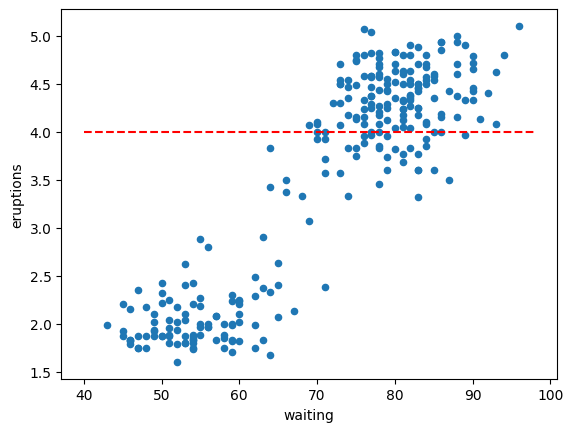

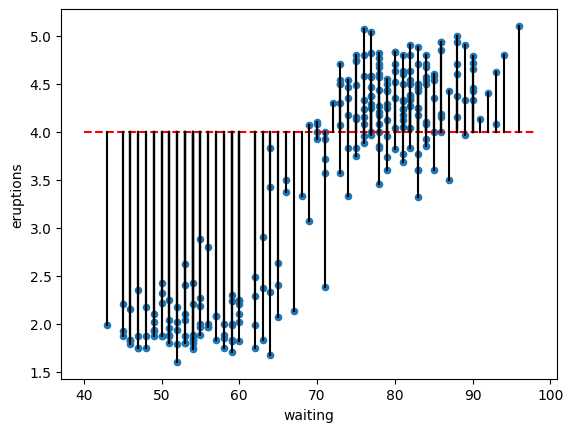

In [ ]:
def primeiro_oraculo(x):
    return 0*x + 4

plota_grafico(primeiro_oraculo)
plota_grafico(primeiro_oraculo, with_error = True)

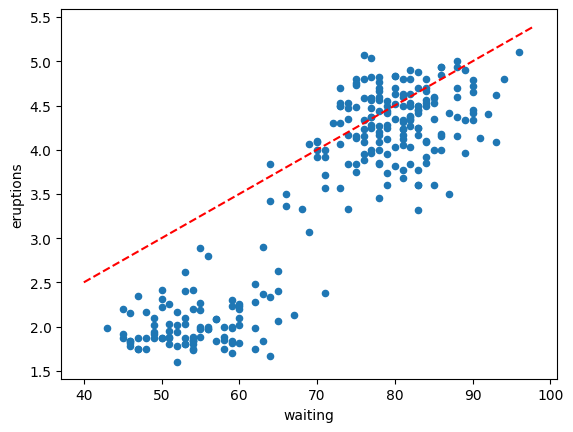

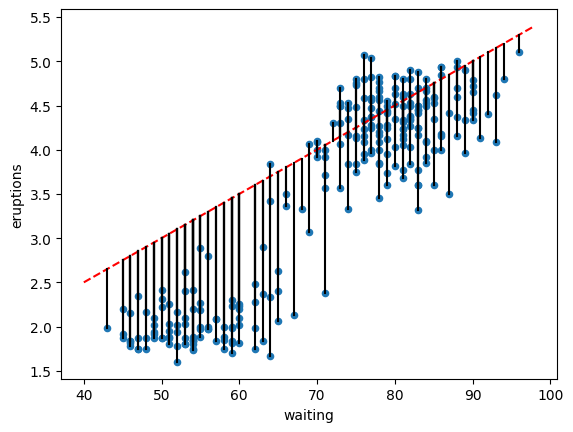

In [ ]:
def segundo_oraculo(x):
    return 0.02*x + 2

plota_grafico(segundo_oraculo)
plota_grafico(segundo_oraculo, with_error = True)

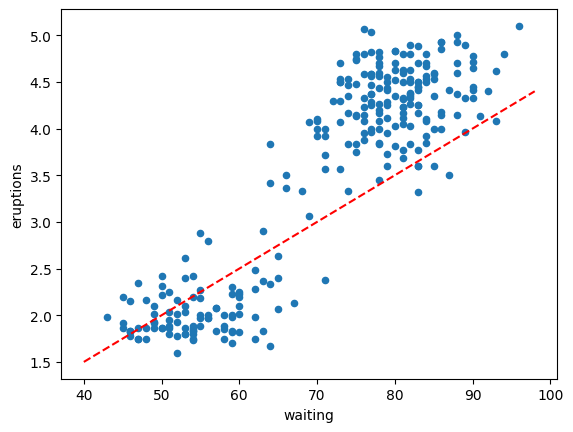

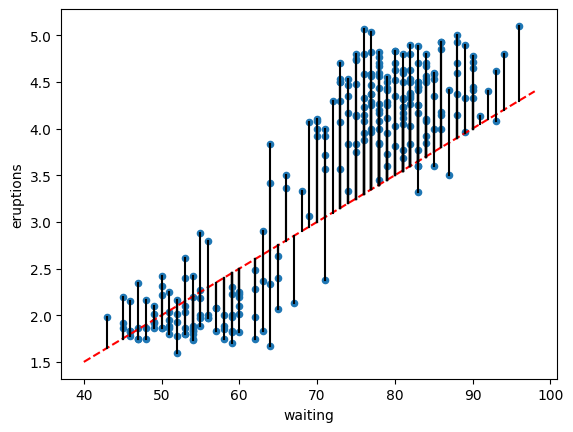

In [ ]:
def terceiro_oraculo(x) :
    return 0.05*x - 0.5

plota_grafico(terceiro_oraculo)
plota_grafico(terceiro_oraculo, with_error = True)

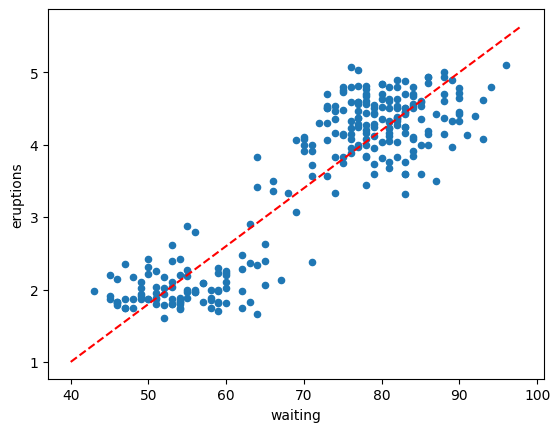

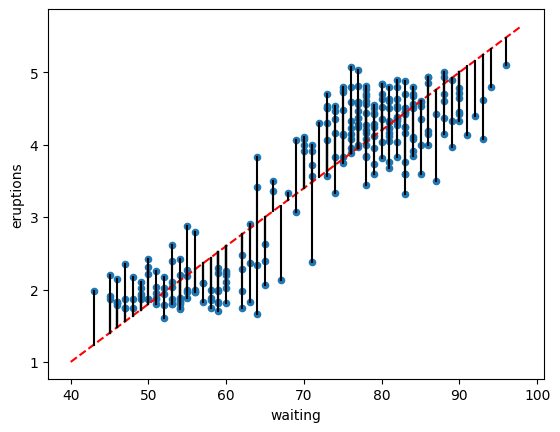

In [ ]:
def quarto_oraculo(x) :
    return 0.08*x -2.2

plota_grafico(quarto_oraculo)
plota_grafico(quarto_oraculo, with_error = True)

In [ ]:
print(erro_quadratico_acumulado(primeiro_oraculo))
print(erro_quadratico_acumulado(segundo_oraculo))
print(erro_quadratico_acumulado(terceiro_oraculo))
print(erro_quadratico_acumulado(quarto_oraculo))

424.402975
183.867475
152.82147500000005
67.588975


In [ ]:
def erro_quadratico_variando_a(b = 0) :
    eixo_a = []
    eixo_erro = []

    for i in range(100) :
        a = (i-50)/100

        eixo_a.append(a)
        print(eixo_a)

        oraculo = lambda x : a*x + b
        eixo_erro.append(erro_quadratico_acumulado(oraculo))

    return eixo_a, eixo_erro

In [ ]:
eixo_a, eixo_erro = erro_quadratico_variando_a()
plt.plot(eixo_a, eixo_erro, 'r--', label='Erros')

In [ ]:
def valor_minimo_de_a(b = 0) :
    pass

In [ ]:
def erro_quadratico_variando_a_b() :
    eixo_b = []
    eixo_a = []
    eixo_erro = []

    min_a = -2
    max_a = +2
    iter_a = 100

    min_b = -50
    max_b = +50
    iter_b = 100

    for i in range(iter_a) :
        a = min_a + i * (max_a - min_a)/iter_a

        for j in range(iter_b) :
            b = min_b + j * (max_b - min_b)/iter_b

            eixo_a.append(a)
            eixo_b.append(b)

            oraculo = lambda x : a*x + b
            eixo_erro.append(erro_quadratico_acumulado(oraculo))

    return eixo_a, eixo_b, eixo_erro

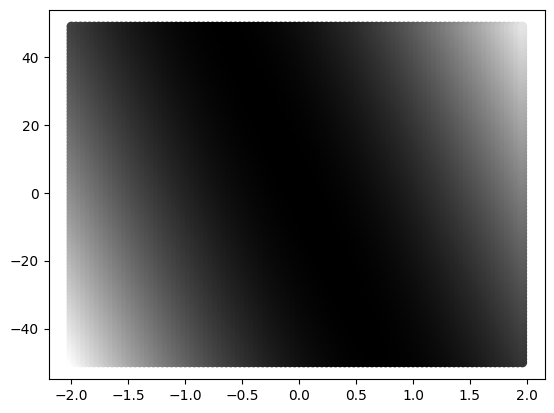

In [ ]:
eixo_a, eixo_b, eixo_erro = erro_quadratico_variando_a_b()
plt.scatter(x = eixo_a, y = eixo_b, c = eixo_erro, cmap = "gray")

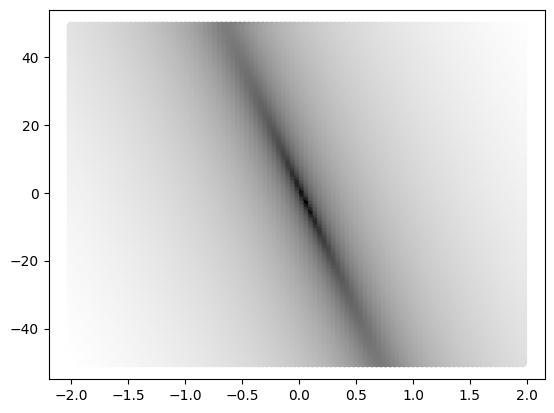

In [ ]:
import math

log_eixo_erro = []

for el in eixo_erro :
    log_eixo_erro.append(math.log(el))

plt.scatter(x = eixo_a, y = eixo_b, c = log_eixo_erro, cmap = "gray")

Text(0.5, 0, 'Erro')

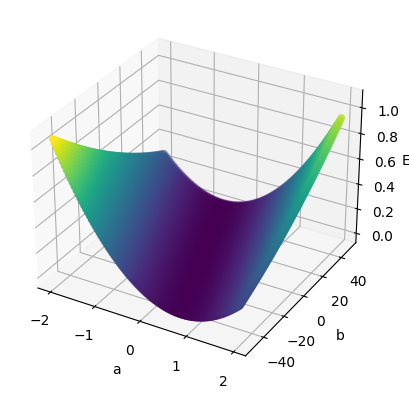

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(eixo_a, eixo_b, eixo_erro, c = eixo_erro)

# Rótulos para facilitar a visualização
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Erro')

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
data = {'x': eixo_a, 'y': eixo_b, 'z': eixo_erro}
df = pd.DataFrame(data)

# Cria o gráfico de pontos 3D usando plotly.express
fig = px.scatter_3d(df, x='x', y='y', z='z', color='z')

fig.show()

In [ ]:
# Cria o gráfico de pontos 3D usando plotly.express
fig = px.scatter_3d(df, x='x', y='y', z='z', log_z = True, color='z')

fig.show()


In [ ]:
erro_minimo = 1000000 ## Um valor alto
a_minimo = None
b_minimo = None

for i in range(len(eixo_erro)) :
    if eixo_erro[i] < erro_minimo :
        a_minimo = eixo_a[i]
        b_minimo = eixo_b[i]

        erro_minimo = eixo_erro[i]

# Valores para o 4° oráculo
print(a_minimo, b_minimo, erro_minimo)

0.08000000000000007 -2.0 76.72617500000055
